## Selección de Parámetros y Creación de Pipelines (Linea de Ensamblaje)

### Creando y usando un pipeline

> <b>Pipelining</b>
* `Pipeline(steps=[...])` - donde steps puede ser una lista de procesos por los cuales los datos van a pasar, en la forma de un dataset, o un diccionario que incluya los parametros en cada paso como sus valores
* Por ejemplo, acá vemos una transformación (SelectKBest) y una clasificación (SVC) ejecutada de manera unitaria en la forma de un pipeline.

Ver un ejemplo completo [acá](http://scikit-learn.org/stable/auto_examples/feature_stacker.html)

Nota:  Si se desean efectuar <b>multiples transformaciones</b> dentro de un solo pipeline, puede intentarse usar [FeatureUnion](http://scikit-learn.org/stable/modules/generated/sklearn.pipeline.FeatureUnion.html#sklearn.pipeline.FeatureUnion)

In [2]:
# Imports for python 2/3 compatibility

from __future__ import absolute_import, division, print_function, unicode_literals

# For python 2, comment these out:
# from builtins import range

In [13]:
from sklearn.cross_validation import train_test_split
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.datasets import load_iris

iris = load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

# Instancia de selección de atributos
selection = SelectKBest(chi2, k = 2)

# Instancia de clasificador
clf = SVC(kernel = 'linear')

# Creación del pipeline
pipeline = Pipeline([("feature selection", selection), ("classification", clf)])

# Entrenamiento/Ajuste del pipeline
pipeline.fit(X, y)

Pipeline(memory=None,
     steps=[('feature selection', SelectKBest(k=2, score_func=<function chi2 at 0x000001BD2575C268>)), ('classification', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt

def plot_fit(X_train, y_train, X_test, y_pred):
    plt.plot(X_test, y_pred, label = "Model")
    #plt.plot(X_test, fun, label = "Function")
    plt.scatter(X_train, y_train, label = "Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))

ValueError: x and y must be the same size

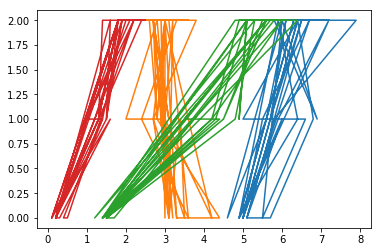

In [15]:
import numpy as np

y_pred = pipeline.predict(X_test)

plot_fit(X_train, y_train, X_test, y_pred)

### Búsqueda en el espacio de parámetros usando `GridSearchCV`

In [16]:
from sklearn.grid_search import GridSearchCV

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly = PolynomialFeatures(include_bias = False)
lm = LinearRegression()

pipeline = Pipeline([("polynomial_features", poly),
                         ("linear_regression", lm)])

param_grid = dict(polynomial_features__degree = list(range(1, 30, 2)),
                  linear_regression__normalize = [False, True])

grid_search = GridSearchCV(pipeline, param_grid=param_grid)
grid_search.fit(X[:, np.newaxis], y)
print(grid_search.best_params_)

ValueError: Found array with dim 3. Estimator expected <= 2.

Created by a Microsoft Employee.
	
The MIT License (MIT)<br>
Copyright (c) 2016 Micheleen Harris